In [321]:
import pandas as pd
from sklearn.metrics import r2_score, confusion_matrix
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [322]:
df = pd.read_csv('/content/salarydataset.csv')
index = df['salary'].idxmax()
print(index)
job = df.loc[index, 'job_title']
max_salary = df.loc[index, 'salary']
print("Job Title with Maximum Salary: ",job," Salary: ",max_salary)

9157
Job Title with Maximum Salary:  Research Scientist  Salary:  450000


In [323]:
df = pd.read_csv('/content/salarydataset.csv')
print("Dataset:")
print(df)
df = df.drop(["salary_currency"], axis =1)
scaler = MinMaxScaler()
label = LabelEncoder()
labels = ["job_title","job_category","employee_residence","experience_level","employment_type","work_setting","company_location","company_size"]
for i in labels:
  df[i] = label.fit_transform(df[i])
print("Dataset after label encoding: ")
print(df)
attributes = [ "work_year" , "job_title" , "job_category", "salary", "salary_in_usd"  ,"employee_residence",  "experience_level" , "employment_type", "work_setting" , "company_location" , "company_size"]
for i in attributes:
  df[i] = scaler.fit_transform(df[[i]])
print("Dataset after scaling: ")
print(df)

Dataset:
      work_year                 job_title                    job_category  \
0          2023      Data DevOps Engineer                Data Engineering   
1          2023            Data Architect  Data Architecture and Modeling   
2          2023            Data Architect  Data Architecture and Modeling   
3          2023            Data Scientist       Data Science and Research   
4          2023            Data Scientist       Data Science and Research   
...         ...                       ...                             ...   
9350       2021           Data Specialist    Data Management and Strategy   
9351       2020            Data Scientist       Data Science and Research   
9352       2021  Principal Data Scientist       Data Science and Research   
9353       2020            Data Scientist       Data Science and Research   
9354       2020     Business Data Analyst                   Data Analysis   

     salary_currency  salary  salary_in_usd employee_residence  \


In [324]:
X, y = df.drop("salary_in_usd",axis = 1), df["salary_in_usd"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
LR = LinearRegression().fit(X_train,y_train)
y_pred = LR.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print(accuracy)

0.9762860164026679


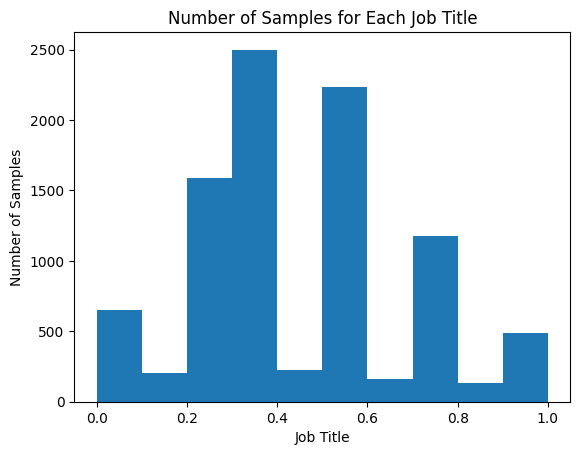

In [325]:
plt.hist(df["job_title"])
new = df["job_title"]
plt.title('Number of Samples for Each Job Title')
plt.xlabel('Job Title')
plt.ylabel('Number of Samples')
plt.show()

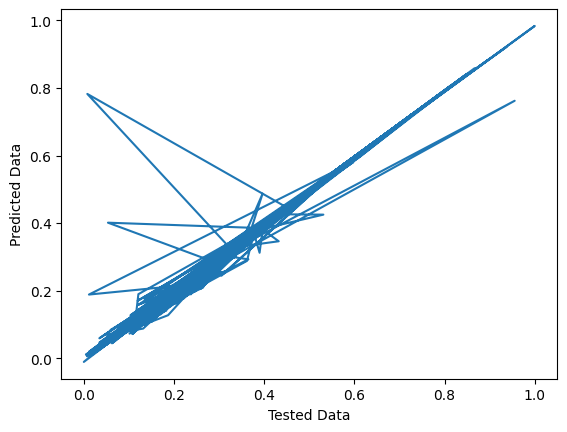

In [326]:
plt.ylabel("Predicted Data")
plt.xlabel("Tested Data")
plt.plot(y_test,y_pred)
plt.show()

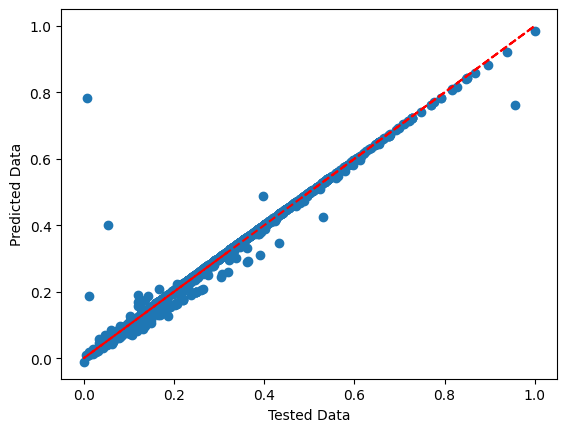

In [327]:
plt.xlabel("Tested Data")
plt.ylabel("Predicted Data")
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.show()

In [328]:
corr_data = df.drop(['salary','salary_in_usd'], axis=1)
correlations = corr_data.corrwith(df['salary'])
print(correlations)
attribute = correlations.idxmax()
print("Highest impacting attribute: ",attribute)

work_year             0.160708
job_title             0.214366
job_category          0.295278
employee_residence    0.178856
experience_level      0.281549
employment_type       0.018723
work_setting         -0.019304
company_location      0.171003
company_size         -0.021408
dtype: float64
Highest impacting attribute:  job_category
